<a href="https://colab.research.google.com/github/YooSH-DY/machintest/blob/main/4_F_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_imagest = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3993 - accuracy: 0.8574 - val_loss: 0.3100 - val_accuracy: 0.8921
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - accuracy: 0.9041 - val_loss: 0.2749 - val_accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2193 - accuracy: 0.9188 - val_loss: 0.2596 - val_accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1875 - accuracy: 0.9310 - val_loss: 0.2369 - val_accuracy: 0.9166
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1585 - accuracy: 0.9420 - val_loss: 0.2325 - val_accuracy: 0.9186
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1360 - accuracy: 0.9490 - val_loss: 0.2387 - val_accuracy: 0.9176
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9568 - val_loss: 0.2538 - val_accuracy:

In [ ]:
test_loss, test_ac = model.evaluate(test_images, test_labels, verbose=2)
test_ac

313/313 - 1s - loss: 0.2870 - accuracy: 0.9179 - 646ms/epoch - 2ms/step


0.917900025844574

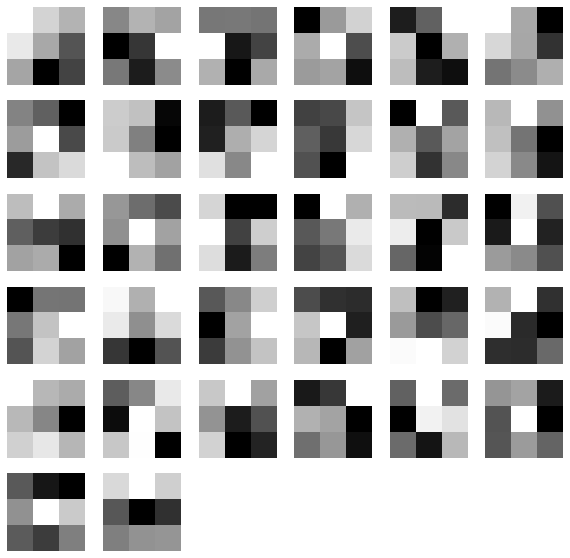

In [ ]:
import matplotlib.pyplot as plt

kernel_weights = model.layers[0].get_weights()[0]

plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(kernel_weights[:,:,0,i], cmap='gray')
    plt.axis('off')
    
plt.show()